## Generate more image training data using data augmentation

"Data augmentation" means you create more virtual training data from existing image data.
you can leverage keras' image data generation

### We will use a picture of a dog as an exmple
Because tensorflow can be configured with either channels_last (the default) or channels_first (if using NVidia card), I am adding routines to handle the two situation


In [6]:
import numpy as np

from tensorflow import keras
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img

# print some info
print('backend:', keras.backend.backend() ,', version:', keras.__version__, ', image_data_format:' , keras.backend.image_data_format())
is_channels_first = (keras.backend.image_data_format() == 'channels_first')

backend: tensorflow , version: 2.2.4-tf , image_data_format: channels_last


#### load the source image

In [7]:
# this is the name of the dog file
dog_file_name = 'dog300.png'

# load the image
img = load_img(dog_file_name)
print('the image:', dog_file_name, ', image type:', img)

# we need to change the image to numpy array for processing and normalize the value (0.0 to 1.0)
ar = (img_to_array(img).astype(float)) / 255.0

#show the shape 
print('converted the image to np array of shape:', ar.shape)

# plt format must be x,y,channel
if is_channels_first:
    mar = np.rollaxis(ar,0,3)
else:
    mar = ar
print('the array to be displayed in plt has the shape:', mar.shape)

the image: dog300.png , image type: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x300 at 0x22333110630>
converted the image to np array of shape: (300, 300, 3)
the array to be displayed in plt has the shape: (300, 300, 3)


#### show the source image in matplotlib

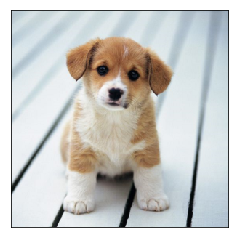

In [8]:
# display the image in matplotlib
%matplotlib inline
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(mar)
plt.show()
plt.close()

#### define how you will "transform" the images

In [9]:
dog_datagen = ImageDataGenerator(
  rotation_range=45,
  width_shift_range=0.2,
  height_shift_range=0.2,
  zoom_range=0.3,
  horizontal_flip=True,
fill_mode='nearest')

# must convert the source a 4 tuple
ar4 = ar.reshape((1,) + ar.shape)
print('the shape of source image in 4-tuple:', ar4.shape)

the shape of source image in 4-tuple: (1, 300, 300, 3)


#### let's generate 10 transformed images from the source

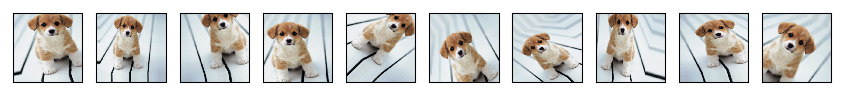

In [12]:
# let's generate 10 modified images
nimg = 10
images = []

i = 0

for generated_image in dog_datagen.flow(ar4 ):
    # drop the 1 in front so we have image that can be shown in matplotlib
    if is_channels_first:
        new_image = generated_image.reshape( 3,300,300)
        new_image = np.rollaxis(new_image,0,3)
    else:
        new_image = generated_image.reshape( 300,300,3)
        images.append(new_image)
    i +=1
    if( i >= nimg):
        break

#plot the images 
fig = plt.figure( figsize = (11,2) ,dpi=96)

for i in range(nimg):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
plt.show()
plt.close()